---
#PARTE III: ANÁLISIS FUNDAMENTAL
---
Realizar análisis fundamental completo comparando tu empresa con el sector y desarrollando una recomendación de inversión.

##Modulo

In [1]:
"""
Módulo de Análisis Fundamental
Trabajo Práctico - Análisis Integral de Inversiones

Implementa análisis fundamental y valuación de empresas

Funciones principales:
- obtener_datos_fundamentales(): Ratios financieros vía yfinance
- calcular_ratios_sector(): Comparación sectorial
- analizar_empresa(): Análisis FODA y ventajas competitivas
- valuar_empresa_dcf(): Valuación por DCF simplificado
"""

import pandas as pd
import numpy as np
import yfinance as yf
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

def obtener_datos_fundamentales(ticker):
    """
    Obtiene ratios fundamentales de Yahoo Finance

    TAREA CRÍTICA: Validar datos y complementar con fuentes locales
    para empresas argentinas

    Parámetros:
    -----------
    ticker : str
        Símbolo de la empresa

    Retorna:
    --------
    dict : Diccionario con ratios fundamentales
    """

    print(f"📊 Obteniendo datos fundamentales para {ticker}...")

    try:
        stock = yf.Ticker(ticker)
        info = stock.info

        # Información básica de la empresa
        empresa_info = {
            'ticker': ticker,
            'nombre': info.get('longName', ticker),
            'sector': info.get('sector', 'N/A'),
            'industria': info.get('industry', 'N/A'),
            'pais': info.get('country', 'N/A'),
            'moneda': info.get('currency', 'USD'),
            'employees': info.get('fullTimeEmployees', 'N/A'),
            'descripcion': info.get('longBusinessSummary', 'N/A')
        }

        # Ratios de Valuación
        ratios_valuacion = {
            'Market_Cap': info.get('marketCap'),
            'Enterprise_Value': info.get('enterpriseValue'),
            'Forward_PE': info.get('forwardPE'),
            'Trailing_PE': info.get('trailingPE'),
            'PEG_Ratio': info.get('pegRatio'),
            'Price_Book': info.get('priceToBook'),
            'Price_Sales': info.get('priceToSalesTrailing12Months'),
            'EV_EBITDA': info.get('enterpriseToEbitda'),
            'EV_Revenue': info.get('enterpriseToRevenue')
        }

        # Ratios de Rentabilidad
        ratios_rentabilidad = {
            'ROE': info.get('returnOnEquity'),
            'ROA': info.get('returnOnAssets'),
            'Operating_Margin': info.get('operatingMargins'),
            'Profit_Margin': info.get('profitMargins'),
            'Gross_Margin': info.get('grossMargins'),
            'EBITDA_Margin': info.get('ebitdaMargins')
        }

        # Ratios de Solvencia
        ratios_solvencia = {
            'Debt_Equity': info.get('debtToEquity'),
            'Current_Ratio': info.get('currentRatio'),
            'Quick_Ratio': info.get('quickRatio'),
            'Total_Cash': info.get('totalCash'),
            'Total_Debt': info.get('totalDebt'),
            'Free_Cashflow': info.get('freeCashflow')
        }

        # Ratios de Mercado
        ratios_mercado = {
            'Beta': info.get('beta'),
            '52_Week_High': info.get('fiftyTwoWeekHigh'),
            '52_Week_Low': info.get('fiftyTwoWeekLow'),
            '52_Week_Change': info.get('52WeekChange'),
            '200_Day_MA': info.get('twoHundredDayAverage'),
            '50_Day_MA': info.get('fiftyDayAverage'),
            'Dividend_Yield': info.get('dividendYield'),
            '5_Year_Avg_Dividend_Yield': info.get('fiveYearAvgDividendYield')
        }

        # Información financiera adicional
        info_financiera = {
            'Revenue': info.get('totalRevenue'),
            'EBITDA': info.get('ebitda'),
            'Net_Income': info.get('netIncomeToCommon'),
            'Book_Value': info.get('bookValue'),
            'Price_Earnings_Growth': info.get('earningsGrowth'),
            'Revenue_Growth': info.get('revenueGrowth'),
            'Earnings_Per_Share': info.get('trailingEps'),
            'Forward_EPS': info.get('forwardEps')
        }

        # Consolidar todos los datos
        datos_completos = {
            'info_empresa': empresa_info,
            'ratios_valuacion': ratios_valuacion,
            'ratios_rentabilidad': ratios_rentabilidad,
            'ratios_solvencia': ratios_solvencia,
            'ratios_mercado': ratios_mercado,
            'info_financiera': info_financiera,
            'fecha_actualizacion': datetime.now()
        }

        print(f"✅ Datos obtenidos para {empresa_info['nombre']}")
        print(f"   🏢 Sector: {empresa_info['sector']}")
        print(f"   🌍 País: {empresa_info['pais']}")
        print(f"   💰 Market Cap: ${ratios_valuacion['Market_Cap']:,}" if ratios_valuacion['Market_Cap'] else "   💰 Market Cap: N/A")

        return datos_completos

    except Exception as e:
        print(f"❌ Error obteniendo datos para {ticker}: {str(e)}")
        return {
            'error': str(e),
            'ticker': ticker,
            'fecha_error': datetime.now()
        }

def calcular_ratios_sector(tickers_sector, nombre_sector="Sector"):
    """
    Calcula y compara ratios fundamentales para un sector

    Parámetros:
    -----------
    tickers_sector : list
        Lista de tickers del sector a analizar
    nombre_sector : str, opcional
        Nombre del sector para reportes

    Retorna:
    --------
    pandas.DataFrame : Comparación sectorial de ratios
    """

    print(f"📊 Analizando sector: {nombre_sector}")
    print(f"🏢 Empresas: {tickers_sector}")

    datos_sector = {}

    for ticker in tickers_sector:
        print(f"\n📈 Procesando {ticker}...")
        datos = obtener_datos_fundamentales(ticker)

        if 'error' not in datos:
            # Extraer ratios clave para comparación
            datos_sector[ticker] = {
                # Información básica
                'Nombre': datos['info_empresa']['nombre'],
                'Sector': datos['info_empresa']['sector'],
                'País': datos['info_empresa']['pais'],

                # Valuación
                'Market_Cap': datos['ratios_valuacion']['Market_Cap'],
                'Enterprise_Value': datos['ratios_valuacion']['Enterprise_Value'],
                'P/E_Forward': datos['ratios_valuacion']['Forward_PE'],
                'P/E_Trailing': datos['ratios_valuacion']['Trailing_PE'],
                'PEG_Ratio': datos['ratios_valuacion']['PEG_Ratio'],
                'Price/Book': datos['ratios_valuacion']['Price_Book'],
                'Price/Sales': datos['ratios_valuacion']['Price_Sales'],
                'EV/EBITDA': datos['ratios_valuacion']['EV_EBITDA'],
                'EV/Revenue': datos['ratios_valuacion']['EV_Revenue'],

                # Rentabilidad
                'ROE': datos['ratios_rentabilidad']['ROE'],
                'ROA': datos['ratios_rentabilidad']['ROA'],
                'Operating_Margin': datos['ratios_rentabilidad']['Operating_Margin'],
                'Profit_Margin': datos['ratios_rentabilidad']['Profit_Margin'],
                'Gross_Margin': datos['ratios_rentabilidad']['Gross_Margin'],

                # Solvencia
                'Debt/Equity': datos['ratios_solvencia']['Debt_Equity'],
                'Current_Ratio': datos['ratios_solvencia']['Current_Ratio'],
                'Quick_Ratio': datos['ratios_solvencia']['Quick_Ratio'],

                # Mercado
                'Beta': datos['ratios_mercado']['Beta'],
                '52W_Change': datos['ratios_mercado']['52_Week_Change'],
                'Dividend_Yield': datos['ratios_mercado']['Dividend_Yield'],

                # Crecimiento
                'Revenue_Growth': datos['info_financiera']['Revenue_Growth'],
                'Earnings_Growth': datos['info_financiera']['Price_Earnings_Growth']
            }
        else:
            print(f"⚠️  No se pudieron obtener datos para {ticker}")

    if not datos_sector:
        print("❌ No se pudieron obtener datos para ninguna empresa del sector")
        return None

    # Convertir a DataFrame
    df_sector = pd.DataFrame(datos_sector).T

    # Calcular estadísticas sectoriales
    print(f"\n📊 === RESUMEN SECTORIAL: {nombre_sector} ===")
    print(f"🏢 Empresas analizadas: {len(df_sector)}")

    # Convertir columnas numéricas
    columnas_numericas = ['Market_Cap', 'P/E_Forward', 'P/E_Trailing', 'Price/Book',
                         'ROE', 'ROA', 'Operating_Margin', 'Profit_Margin', 'Beta']

    for col in columnas_numericas:
        if col in df_sector.columns:
            df_sector[col] = pd.to_numeric(df_sector[col], errors='coerce')

    # Estadísticas descriptivas
    if 'P/E_Forward' in df_sector.columns:
        pe_promedio = df_sector['P/E_Forward'].mean()
        print(f"📈 P/E Forward promedio: {pe_promedio:.1f}" if not pd.isna(pe_promedio) else "📈 P/E Forward promedio: N/A")

    if 'ROE' in df_sector.columns:
        roe_promedio = df_sector['ROE'].mean()
        print(f"💰 ROE promedio: {roe_promedio:.1%}" if not pd.isna(roe_promedio) else "💰 ROE promedio: N/A")

    if 'Operating_Margin' in df_sector.columns:
        margin_promedio = df_sector['Operating_Margin'].mean()
        print(f"📊 Margen operativo promedio: {margin_promedio:.1%}" if not pd.isna(margin_promedio) else "📊 Margen operativo promedio: N/A")

    return df_sector

def identificar_lideres_rezagados(df_sector, metricas_clave=['P/E_Forward', 'ROE', 'Operating_Margin']):
    """
    Identifica líderes y rezagados del sector basado en métricas clave

    Parámetros:
    -----------
    df_sector : pandas.DataFrame
        DataFrame con datos sectoriales
    metricas_clave : list, opcional
        Lista de métricas para evaluar

    Retorna:
    --------
    dict : Análisis de líderes y rezagados
    """

    print("🏆 Identificando líderes y rezagados del sector...")

    if df_sector is None or df_sector.empty:
        return None

    analisis = {
        'lideres': {},
        'rezagados': {},
        'ranking': {}
    }

    for metrica in metricas_clave:
        if metrica in df_sector.columns:
            # Limpiar datos
            datos_metrica = df_sector[metrica].dropna()

            if len(datos_metrica) > 0:
                # Para P/E, menor es mejor; para ROE y márgenes, mayor es mejor
                if 'P/E' in metrica or 'Price' in metrica:
                    # Menor es mejor (valuación más atractiva)
                    lider = datos_metrica.idxmin()
                    rezagado = datos_metrica.idxmax()
                    ranking = datos_metrica.sort_values()
                else:
                    # Mayor es mejor (rentabilidad, márgenes)
                    lider = datos_metrica.idxmax()
                    rezagado = datos_metrica.idxmin()
                    ranking = datos_metrica.sort_values(ascending=False)

                analisis['lideres'][metrica] = {
                    'empresa': lider,
                    'valor': datos_metrica[lider]
                }

                analisis['rezagados'][metrica] = {
                    'empresa': rezagado,
                    'valor': datos_metrica[rezagado]
                }

                analisis['ranking'][metrica] = ranking

                print(f"📊 {metrica}:")
                print(f"   🥇 Líder: {lider} ({datos_metrica[lider]:.2f})")
                print(f"   🔻 Rezagado: {rezagado} ({datos_metrica[rezagado]:.2f})")

    return analisis

def analizar_empresa(ticker, incluir_competidores=True, competidores=None):
    """
    Análisis integral de una empresa específica

    Parámetros:
    -----------
    ticker : str
        Ticker de la empresa a analizar
    incluir_competidores : bool, opcional
        Si incluir análisis de competidores
    competidores : list, opcional
        Lista de competidores a incluir

    Retorna:
    --------
    dict : Análisis completo de la empresa
    """

    print(f"🔍 === ANÁLISIS INTEGRAL: {ticker} ===")

    # 1. Datos fundamentales de la empresa
    datos_empresa = obtener_datos_fundamentales(ticker)

    if 'error' in datos_empresa:
        return datos_empresa

    # 2. Análisis FODA básico basado en ratios
    foda = generar_foda_basico(datos_empresa)

    # 3. Análisis de competidores si se solicita
    analisis_competitivo = None
    if incluir_competidores and competidores:
        print(f"\n🏢 Analizando competidores: {competidores}")
        todas_empresas = [ticker] + competidores
        analisis_competitivo = calcular_ratios_sector(todas_empresas, "Análisis Competitivo")

    # 4. Evaluación de ventajas competitivas
    ventajas_competitivas = evaluar_ventajas_competitivas(datos_empresa)

    # 5. Análisis de riesgos
    riesgos = identificar_riesgos(datos_empresa)

    # 6. Consolidar análisis
    analisis_completo = {
        'ticker': ticker,
        'datos_fundamentales': datos_empresa,
        'analisis_foda': foda,
        'ventajas_competitivas': ventajas_competitivas,
        'riesgos_identificados': riesgos,
        'analisis_competitivo': analisis_competitivo,
        'fecha_analisis': datetime.now()
    }

    return analisis_completo

def generar_foda_basico(datos_empresa):
    """
    Genera un análisis FODA básico basado en ratios financieros

    Parámetros:
    -----------
    datos_empresa : dict
        Datos fundamentales de la empresa

    Retorna:
    --------
    dict : Análisis FODA
    """

    fortalezas = []
    oportunidades = []
    debilidades = []
    amenazas = []

    ratios_val = datos_empresa['ratios_valuacion']
    ratios_rent = datos_empresa['ratios_rentabilidad']
    ratios_solv = datos_empresa['ratios_solvencia']
    ratios_merc = datos_empresa['ratios_mercado']

    # Análisis de fortalezas
    if ratios_rent['ROE'] and ratios_rent['ROE'] > 0.15:
        fortalezas.append(f"ROE alto ({ratios_rent['ROE']:.1%}) - Buena rentabilidad sobre el patrimonio")

    if ratios_rent['Operating_Margin'] and ratios_rent['Operating_Margin'] > 0.15:
        fortalezas.append(f"Margen operativo alto ({ratios_rent['Operating_Margin']:.1%}) - Eficiencia operativa")

    if ratios_solv['Current_Ratio'] and ratios_solv['Current_Ratio'] > 2:
        fortalezas.append(f"Liquidez sólida (Ratio corriente: {ratios_solv['Current_Ratio']:.1f})")

    # Análisis de debilidades
    if ratios_rent['ROE'] and ratios_rent['ROE'] < 0.08:
        debilidades.append(f"ROE bajo ({ratios_rent['ROE']:.1%}) - Rentabilidad limitada")

    if ratios_solv['Debt_Equity'] and ratios_solv['Debt_Equity'] > 100:
        debilidades.append(f"Alto apalancamiento (D/E: {ratios_solv['Debt_Equity']:.0f}%) - Riesgo financiero")

    if ratios_rent['Operating_Margin'] and ratios_rent['Operating_Margin'] < 0.05:
        debilidades.append(f"Margen operativo bajo ({ratios_rent['Operating_Margin']:.1%}) - Presión en rentabilidad")

    # Análisis de oportunidades (basado en valuación)
    if ratios_val['Forward_PE'] and ratios_val['Forward_PE'] < 15:
        oportunidades.append(f"Valuación atractiva (P/E Forward: {ratios_val['Forward_PE']:.1f})")

    if ratios_val['Price_Book'] and ratios_val['Price_Book'] < 1.5:
        oportunidades.append(f"Cotiza cerca del valor libro (P/B: {ratios_val['Price_Book']:.1f})")

    # Análisis de amenazas
    if ratios_merc['Beta'] and ratios_merc['Beta'] > 1.5:
        amenazas.append(f"Alta volatilidad (Beta: {ratios_merc['Beta']:.1f}) - Mayor riesgo de mercado")

    if ratios_val['Forward_PE'] and ratios_val['Forward_PE'] > 30:
        amenazas.append(f"Valuación elevada (P/E Forward: {ratios_val['Forward_PE']:.1f}) - Riesgo de corrección")

    return {
        'Fortalezas': fortalezas,
        'Oportunidades': oportunidades,
        'Debilidades': debilidades,
        'Amenazas': amenazas
    }

def evaluar_ventajas_competitivas(datos_empresa):
    """
    Evalúa las posibles ventajas competitivas (economic moats)

    Parámetros:
    -----------
    datos_empresa : dict
        Datos fundamentales de la empresa

    Retorna:
    --------
    dict : Evaluación de ventajas competitivas
    """

    ventajas = {
        'moat_score': 0,  # Puntuación de 0-10
        'indicadores_positivos': [],
        'areas_preocupacion': [],
        'recomendaciones': []
    }

    ratios_rent = datos_empresa['ratios_rentabilidad']
    ratios_val = datos_empresa['ratios_valuacion']
    info_empresa = datos_empresa['info_empresa']

    # Indicadores de ventaja competitiva

    # 1. ROE consistentemente alto
    if ratios_rent['ROE'] and ratios_rent['ROE'] > 0.15:
        ventajas['moat_score'] += 2
        ventajas['indicadores_positivos'].append("ROE alto - Posible ventaja competitiva")

    # 2. Márgenes operativos elevados
    if ratios_rent['Operating_Margin'] and ratios_rent['Operating_Margin'] > 0.20:
        ventajas['moat_score'] += 2
        ventajas['indicadores_positivos'].append("Márgenes operativos elevados - Poder de pricing")

    # 3. Market cap grande (economías de escala)
    if ratios_val['Market_Cap'] and ratios_val['Market_Cap'] > 50_000_000_000:  # >$50B
        ventajas['moat_score'] += 1
        ventajas['indicadores_positivos'].append("Gran capitalización - Posibles economías de escala")

    # 4. Sector defensivo
    sectores_defensivos = ['Utilities', 'Consumer Staples', 'Healthcare']
    if info_empresa['sector'] in sectores_defensivos:
        ventajas['moat_score'] += 1
        ventajas['indicadores_positivos'].append(f"Sector defensivo ({info_empresa['sector']})")

    # Áreas de preocupación
    if ratios_rent['ROE'] and ratios_rent['ROE'] < 0.10:
        ventajas['areas_preocupacion'].append("ROE bajo - Ventaja competitiva limitada")

    if ratios_rent['Operating_Margin'] and ratios_rent['Operating_Margin'] < 0.10:
        ventajas['areas_preocupacion'].append("Márgenes operativos bajos - Presión competitiva")

    # Recomendaciones
    if ventajas['moat_score'] >= 5:
        ventajas['recomendaciones'].append("Empresa con ventajas competitivas sólidas")
    elif ventajas['moat_score'] >= 3:
        ventajas['recomendaciones'].append("Ventajas competitivas moderadas - Monitorear evolución")
    else:
        ventajas['recomendaciones'].append("Ventajas competitivas limitadas - Mayor riesgo competitivo")

    return ventajas

def identificar_riesgos(datos_empresa):
    """
    Identifica riesgos específicos de la empresa

    Parámetros:
    -----------
    datos_empresa : dict
        Datos fundamentales de la empresa

    Retorna:
    --------
    dict : Análisis de riesgos
    """

    riesgos = {
        'riesgos_financieros': [],
        'riesgos_operativos': [],
        'riesgos_mercado': [],
        'riesgos_especificos': [],
        'nivel_riesgo': 'Bajo'  # Bajo, Medio, Alto
    }

    ratios_solv = datos_empresa['ratios_solvencia']
    ratios_rent = datos_empresa['ratios_rentabilidad']
    ratios_merc = datos_empresa['ratios_mercado']
    info_empresa = datos_empresa['info_empresa']

    puntuacion_riesgo = 0

    # Riesgos financieros
    if ratios_solv['Debt_Equity'] and ratios_solv['Debt_Equity'] > 100:
        riesgos['riesgos_financieros'].append(f"Alto apalancamiento (D/E: {ratios_solv['Debt_Equity']:.0f}%)")
        puntuacion_riesgo += 2

    if ratios_solv['Current_Ratio'] and ratios_solv['Current_Ratio'] < 1:
        riesgos['riesgos_financieros'].append(f"Liquidez comprometida (Ratio corriente: {ratios_solv['Current_Ratio']:.1f})")
        puntuacion_riesgo += 2

    # Riesgos operativos
    if ratios_rent['Operating_Margin'] and ratios_rent['Operating_Margin'] < 0:
        riesgos['riesgos_operativos'].append("Márgenes operativos negativos")
        puntuacion_riesgo += 3

    if ratios_rent['ROE'] and ratios_rent['ROE'] < 0:
        riesgos['riesgos_operativos'].append("ROE negativo - Destrucción de valor")
        puntuacion_riesgo += 2

    # Riesgos de mercado
    if ratios_merc['Beta'] and ratios_merc['Beta'] > 1.5:
        riesgos['riesgos_mercado'].append(f"Alta volatilidad (Beta: {ratios_merc['Beta']:.1f})")
        puntuacion_riesgo += 1

    # Riesgos específicos por país
    if info_empresa['pais'] == 'Argentina':
        riesgos['riesgos_especificos'].extend([
            "Riesgo país - Inestabilidad macroeconómica",
            "Riesgo cambiario - Volatilidad del peso argentino",
            "Riesgo regulatorio - Posibles cambios en políticas"
        ])
        puntuacion_riesgo += 2

    # Determinar nivel de riesgo
    if puntuacion_riesgo >= 6:
        riesgos['nivel_riesgo'] = 'Alto'
    elif puntuacion_riesgo >= 3:
        riesgos['nivel_riesgo'] = 'Medio'
    else:
        riesgos['nivel_riesgo'] = 'Bajo'

    return riesgos

def valuar_empresa_dcf(ticker, tasa_crecimiento=0.05, tasa_descuento=0.10, años_proyeccion=5):
    """
    Valuación simplificada por DCF (Discounted Cash Flow)

    TAREA CRÍTICA: Los estudiantes deben entender y justificar los supuestos

    Parámetros:
    -----------
    ticker : str
        Ticker de la empresa
    tasa_crecimiento : float, opcional
        Tasa de crecimiento perpetuo (default: 5%)
    tasa_descuento : float, opcional
        WACC estimado (default: 10%)
    años_proyeccion : int, opcional
        Años de proyección explícita (default: 5)

    Retorna:
    --------
    dict : Resultados de la valuación DCF
    """

    print(f"💰 Valuando {ticker} por DCF...")
    print(f"   📈 Tasa crecimiento perpetuo: {tasa_crecimiento:.1%}")
    print(f"   💸 Tasa descuento (WACC): {tasa_descuento:.1%}")
    print(f"   📅 Años proyección: {años_proyeccion}")

    # Obtener datos de la empresa
    datos = obtener_datos_fundamentales(ticker)

    if 'error' in datos:
        return {'error': 'No se pudieron obtener datos para DCF'}

    # Extraer información financiera
    fcf_actual = datos['ratios_solvencia']['Free_Cashflow']
    total_debt = datos['ratios_solvencia']['Total_Debt']
    total_cash = datos['ratios_solvencia']['Total_Cash']
    market_cap = datos['ratios_valuacion']['Market_Cap']

    if not fcf_actual:
        return {'error': 'Free Cash Flow no disponible para DCF'}

    # Proyección de Free Cash Flows
    fcf_proyectado = []
    fcf_base = fcf_actual

    for año in range(1, años_proyeccion + 1):
        # Crecimiento decreciente: alto inicial, convergiendo a tasa perpetua
        tasa_año = tasa_crecimiento + (0.10 - tasa_crecimiento) * np.exp(-año/2)
        fcf_año = fcf_base * (1 + tasa_año)
        fcf_proyectado.append(fcf_año)
        fcf_base = fcf_año

    # Valor terminal
    fcf_terminal = fcf_proyectado[-1] * (1 + tasa_crecimiento)
    valor_terminal = fcf_terminal / (tasa_descuento - tasa_crecimiento)

    # Descontar flujos a valor presente
    vp_fcf = []
    for i, fcf in enumerate(fcf_proyectado, 1):
        vp = fcf / (1 + tasa_descuento) ** i
        vp_fcf.append(vp)

    # Valor presente del valor terminal
    vp_terminal = valor_terminal / (1 + tasa_descuento) ** años_proyeccion

    # Valor total de la empresa
    valor_empresa = sum(vp_fcf) + vp_terminal

    # Valor del equity (valor empresa - deuda neta)
    deuda_neta = (total_debt or 0) - (total_cash or 0)
    valor_equity = valor_empresa - deuda_neta

    # Obtener número de acciones (aproximado por market cap / precio actual)
    try:
        stock = yf.Ticker(ticker)
        precio_actual = stock.history(period='1d')['Close'].iloc[-1]
        acciones_circulacion = market_cap / precio_actual if market_cap and precio_actual else None
        precio_objetivo = valor_equity / acciones_circulacion if acciones_circulacion else None
    except:
        precio_actual = None
        precio_objetivo = None
        acciones_circulacion = None

    resultados_dcf = {
        'ticker': ticker,
        'supuestos': {
            'fcf_base': fcf_actual,
            'tasa_crecimiento': tasa_crecimiento,
            'tasa_descuento': tasa_descuento,
            'años_proyeccion': años_proyeccion
        },
        'proyecciones': {
            'fcf_proyectado': fcf_proyectado,
            'valor_terminal': valor_terminal,
            'vp_fcf': vp_fcf,
            'vp_terminal': vp_terminal
        },
        'valuacion': {
            'valor_empresa': valor_empresa,
            'deuda_neta': deuda_neta,
            'valor_equity': valor_equity,
            'precio_actual': precio_actual,
            'precio_objetivo': precio_objetivo,
            'upside_downside': (precio_objetivo / precio_actual - 1) if precio_objetivo and precio_actual else None
        },
        'fecha_valuacion': datetime.now()
    }

    # Mostrar resultados
    print(f"✅ Valuación DCF completada:")
    print(f"   🏢 Valor empresa: ${valor_empresa:,.0f}")
    print(f"   💰 Valor equity: ${valor_equity:,.0f}")
    if precio_objetivo and precio_actual:
        print(f"   🎯 Precio objetivo: ${precio_objetivo:.2f}")
        print(f"   📊 Precio actual: ${precio_actual:.2f}")
        print(f"   📈 Upside/Downside: {(precio_objetivo/precio_actual-1):.1%}")

    return resultados_dcf

# Ejemplo de uso
if __name__ == "__main__":
    print("🧪 Testing módulo fundamental_analysis...")

    # Test con Apple
    try:
        print("Testing análisis fundamental de Apple...")
        analisis_aapl = analizar_empresa('AAPL', incluir_competidores=True,
                                       competidores=['MSFT', 'GOOGL'])

        print("Testing valuación DCF...")
        dcf_aapl = valuar_empresa_dcf('AAPL')

        print("✅ Tests completados exitosamente")

    except Exception as e:
        print(f"❌ Error en tests: {e}")

🧪 Testing módulo fundamental_analysis...
Testing análisis fundamental de Apple...
🔍 === ANÁLISIS INTEGRAL: AAPL ===
📊 Obteniendo datos fundamentales para AAPL...
✅ Datos obtenidos para Apple Inc.
   🏢 Sector: Technology
   🌍 País: United States
   💰 Market Cap: $3,436,888,195,072

🏢 Analizando competidores: ['MSFT', 'GOOGL']
📊 Analizando sector: Análisis Competitivo
🏢 Empresas: ['AAPL', 'MSFT', 'GOOGL']

📈 Procesando AAPL...
📊 Obteniendo datos fundamentales para AAPL...
✅ Datos obtenidos para Apple Inc.
   🏢 Sector: Technology
   🌍 País: United States
   💰 Market Cap: $3,436,888,195,072

📈 Procesando MSFT...
📊 Obteniendo datos fundamentales para MSFT...
✅ Datos obtenidos para Microsoft Corporation
   🏢 Sector: Technology
   🌍 País: United States
   💰 Market Cap: $3,866,511,802,368

📈 Procesando GOOGL...
📊 Obteniendo datos fundamentales para GOOGL...
✅ Datos obtenidos para Alphabet Inc.
   🏢 Sector: Communication Services
   🌍 País: United States
   💰 Market Cap: $2,470,758,055,936

📊 =

##1. Dashboard Sectorial
Crear tabla comparativa con todas las empresas del sector incluyendo:

Ratios de Valuación:
* Enterprise Value/EBITDA
* Enterprise Value/Revenue
* Forward P/E y Trailing P/E
* PEG Ratio
* Price/Book
* Price/Sales

Ratios de Rentabilidad:
* Operating Margin
* Profit Margin
* Return on Assets (ROA)
* Return on Equity (ROE)

Ratios de Solvencia:
* Total Debt/Equity
* Interest Coverage

Ratios de Mercado:
* Market Cap
* 52 Week High/Low
* 52-Week Change
* Beta

---

###Tabla comparativa

In [2]:
import pandas as pd
import numpy as np

tickers = ["LOMA", "CRH", "CX", "VMC"]

# Descargar usando tu función
raw = {t: obtener_datos_fundamentales(t) for t in tickers}

# Aplanar a una fila por empresa
def _flatten(d):
    if 'error' in d:
        return pd.Series({'ticker': d.get('ticker'), 'error': d['error']})
    out = {}
    for sec in ['info_empresa','ratios_valuacion','ratios_rentabilidad','ratios_solvencia','ratios_mercado','info_financiera']:
        for k,v in d.get(sec,{}).items():
            out[f'{sec}_{k}'] = v
    return pd.Series(out)

flat = pd.DataFrame([_flatten(raw[t]) for t in tickers])
flat.index = [raw[t]['info_empresa']['ticker'] if 'error' not in raw[t] else t for t in tickers]
display(flat.T) # Transpose the DataFrame

📊 Obteniendo datos fundamentales para LOMA...
✅ Datos obtenidos para Loma Negra Compañía Industrial Argentina Sociedad Anónima
   🏢 Sector: Basic Materials
   🌍 País: Argentina
   💰 Market Cap: $1,246,381,440
📊 Obteniendo datos fundamentales para CRH...
✅ Datos obtenidos para CRH plc
   🏢 Sector: Basic Materials
   🌍 País: Ireland
   💰 Market Cap: $74,493,566,976
📊 Obteniendo datos fundamentales para CX...
✅ Datos obtenidos para CEMEX, S.A.B. de C.V.
   🏢 Sector: Basic Materials
   🌍 País: Mexico
   💰 Market Cap: $12,672,934,912
📊 Obteniendo datos fundamentales para VMC...
✅ Datos obtenidos para Vulcan Materials Company
   🏢 Sector: Basic Materials
   🌍 País: United States
   💰 Market Cap: $38,529,998,848


,LOMA,CRH,CX,VMC
info_empresa_ticker,LOMA,CRH,CX,VMC
info_empresa_nombre,Loma Negra Compañía Industrial Argentina Socie...,CRH plc,"CEMEX, S.A.B. de C.V.",Vulcan Materials Company
info_empresa_sector,Basic Materials,Basic Materials,Basic Materials,Basic Materials
info_empresa_industria,Building Materials,Building Materials,Building Materials,Building Materials
info_empresa_pais,Argentina,Ireland,Mexico,United States
info_empresa_moneda,USD,USD,USD,USD
info_empresa_employees,N/A,79800,42587,11971
info_empresa_descripcion,Loma Negra Compañía Industrial Argentina Socie...,"CRH plc, together with its subsidiaries, provi...","CEMEX, S.A.B. de C.V., together with its subsi...",Vulcan Materials Company produces and supplies...
ratios_valuacion_Market_Cap,1246381440,74493566976,12672934912,38529998848
ratios_valuacion_Enterprise_Value,265271476224,91177672704,129373528064,43912691712


###Ratios de Valuación

In [3]:
cols_val = {
    'EV/EBITDA'     : 'ratios_valuacion_EV_EBITDA',
    'EV/Revenue'    : 'ratios_valuacion_EV_Revenue',
    'Forward P/E'   : 'ratios_valuacion_Forward_PE',
    'Trailing P/E'  : 'ratios_valuacion_Trailing_PE',
    'PEG Ratio'     : 'ratios_valuacion_PEG_Ratio',
    'Price/Book'    : 'ratios_valuacion_Price_Book',
    'Price/Sales'   : 'ratios_valuacion_Price_Sales'
}
valuacion = flat[list(cols_val.values())].rename(columns={v:k for k,v in cols_val.items()})
valuacion = valuacion.apply(pd.to_numeric, errors='coerce')
display(valuacion.sort_values('EV/EBITDA', ascending=True).T)

,LOMA,CRH,VMC,CX
EV/EBITDA,1.776000,12.893000,20.128000,56.916000
EV/Revenue,0.398000,2.509000,5.782000,8.253000
Forward P/E,12.068966,18.260296,32.116740,11.684931
Trailing P/E,30.882353,23.236897,40.446600,13.983605
PEG Ratio,NaN,NaN,NaN,NaN
Price/Book,0.001308,3.339459,4.578813,9.261672
Price/Sales,0.001869,2.049511,5.073341,0.808443


###Ratios de Rentabilidad

In [4]:
cols_rent = {
    'Operating Margin' : 'ratios_rentabilidad_Operating_Margin',
    'Profit Margin'    : 'ratios_rentabilidad_Profit_Margin',
    'ROA'              : 'ratios_rentabilidad_ROA',
    'ROE'              : 'ratios_rentabilidad_ROE'
}
rentabilidad = flat[list(cols_rent.values())].rename(columns={v:k for k,v in cols_rent.items()})
rentabilidad = rentabilidad.apply(pd.to_numeric, errors='coerce')
display(rentabilidad.sort_values('ROE', ascending=False).T)

,CRH,VMC,CX,LOMA
Operating Margin,0.18822,0.22279,0.10207,0.08484
Profit Margin,0.09090,0.12523,0.09608,0.07760
ROA,0.06232,0.05953,0.03014,0.04119
ROE,0.14782,0.11870,0.07033,0.06625


###Ratios de Solvencia

In [5]:
import yfinance as yf

# Debt/Equity desde tu módulo
solv_base = flat[['ratios_solvencia_Debt_Equity']].rename(columns={'ratios_solvencia_Debt_Equity':'Total Debt/Equity'})
solv_base = solv_base.apply(pd.to_numeric, errors='coerce')

# Interest Coverage: EBIT / |Interest Expense| (TTM simple con últimos trimestres disponibles)
def interest_coverage_ttm(tck):
    tk = yf.Ticker(tck)
    qinc = tk.quarterly_financials
    if qinc is None or qinc.empty:
        return np.nan
    qinc = qinc.apply(pd.to_numeric, errors='coerce')
    # aceptar varias etiquetas
    def _pick(label_opts):
        idx = [i for i in qinc.index if any(lbl.lower() in i.lower() for lbl in label_opts)]
        return qinc.loc[idx[0]].iloc[:4].sum(skipna=True) if idx else np.nan
    ebit_ttm     = _pick(['Operating Income','EBIT','Ebit'])
    interest_ttm = _pick(['Interest Expense'])
    if pd.isna(ebit_ttm) or pd.isna(interest_ttm) or interest_ttm == 0:
        return np.nan
    return ebit_ttm / abs(interest_ttm)

ic = {t: interest_coverage_ttm(t) for t in tickers}
ic_series = pd.Series(ic, name='Interest Coverage')

solvencia = pd.concat([solv_base, ic_series], axis=1)
display(solvencia.sort_values('Total Debt/Equity', ascending=True).T)


,LOMA,CX,VMC,CRH
Total Debt/Equity,29.429000,50.679000,65.384000,74.473000
Interest Coverage,7.610313,3.323097,9.335789,10.170213


###Ratios de Mercado


In [6]:
cols_mkt = {
    'Market Cap'     : 'ratios_valuacion_Market_Cap',
    '52 Week High'   : 'ratios_mercado_52_Week_High',
    '52 Week Low'    : 'ratios_mercado_52_Week_Low',
    '52-Week Change' : 'ratios_mercado_52_Week_Change',
    'Beta'           : 'ratios_mercado_Beta'
}
mercado = flat[list(cols_mkt.values())].rename(columns={v:k for k,v in cols_mkt.items()})
# numéricas donde aplique
num_cols = ['Market Cap','52 Week High','52 Week Low','52-Week Change','Beta']
mercado[num_cols] = mercado[num_cols].apply(pd.to_numeric, errors='coerce')
display(mercado.sort_values('Market Cap', ascending=False).T)


,CRH,VMC,CX,LOMA
Market Cap,7.449357e+10,3.853000e+10,1.267293e+10,1.246381e+09
52 Week High,1.139500e+02,2.983100e+02,8.830000e+00,1.417000e+01
52 Week Low,7.675000e+01,2.150800e+02,4.890000e+00,6.760000e+00
52-Week Change,3.275125e-01,1.991163e-01,2.724551e-01,5.541126e-01
Beta,1.195000e+00,8.320000e-01,1.078000e+00,9.660000e-01


##2. Análisis de Calidad y Riesgo

* Análisis FODA de tu empresa asignada
* Ventajas competitivas sostenibles (moat económico)
* Riesgos específicos:
  * Regulatorios
  * Cambiarios (para empresas argentinas)
  * Operativos
  * De mercado

---

###Análisis FODA - Loma Negra

Fortalezas:

* Liderazgo de mercado: Principal productor de cemento en Argentina, con fuerte reconocimiento de marca y amplia red de distribución.
* Integración vertical: Control sobre gran parte de su cadena productiva, lo que le permite eficiencias de costos y flexibilidad operativa.
* Moat económico: Altas barreras de entrada por escala, capital intensivo y logística propia.


Oportunidades:

* Recuperación del sector construcción: Potencial de crecimiento ante mejoras en la economía o políticas públicas de infraestructura.
* Exportaciones regionales: Posibilidad de aprovechar mercados limítrofes y cambios en el tipo de cambio.
* Inversiones en eficiencia: Implementación de tecnologías para reducción de costos y mejora ambiental.


Debilidades:

* Alta exposición al ciclo económico argentino: Demanda muy dependiente de la actividad local y la obra pública.

* Costos energéticos elevados: Alta incidencia de energía en su estructura de costos, en un contexto de precios volátiles.


Amenazas / Riesgos específicos:

* Riesgo regulatorio: Cambios en controles de precios, retenciones a la exportación, o políticas de subsidios pueden afectar márgenes.

* Riesgo cambiario: Devaluaciones del peso pueden aumentar costos en dólares y afectar balances, aunque también mejoran competitividad exportadora.

* Riesgo operativo: Dependencia de insumos clave (energía, transporte) y posibles interrupciones sindicales o logísticas.

* Riesgo de mercado: Presión competitiva de nuevos entrantes, cambios tecnológicos o sustitución por materiales alternativos.

**Conclusión**:
Loma Negra mantiene ventajas competitivas sostenibles por su escala y posición dominante, pero enfrenta desafíos significativos derivados del contexto macroeconómico argentino, regulaciones cambiantes y alta volatilidad cambiaria.

###Ventajas competitivas sostenibles

* Escala y barreras de entrada: El alto capital requerido para instalar plantas y desarrollar logística otorga protección frente a nuevos competidores.

* Marca y reputación: Reconocimiento y confianza consolidada en el mercado argentino.

* Red de distribución propia: Cobertura nacional que reduce costos y mejora tiempos de entrega.

###Riesgos especificos

* Regulatorios: Posibles controles de precios, cambios en políticas de subsidios energéticos y regulaciones ambientales más estrictas.

* Cambiarios: Alta exposición al riesgo devaluatorio, ya que muchos insumos tienen componentes dolarizados y el mercado local se maneja en pesos.

* Operativos: Dependencia de insumos críticos (energía, transporte, materias primas) y riesgo de paros sindicales o interrupciones logísticas.

* De mercado: Volatilidad en la demanda ligada al ciclo económico, competencia de importaciones y sustitución por otros materiales en la construcción.

###Pregunta Crítica
¿Cómo impacta el contexto macroeconómico argentino actual en la valuación de tu empresa comparada con competidores internacionales?


El contexto macroeconómico argentino actual impacta negativamente en la valuación de Loma Negra frente a competidores internacionales.

La inflación elevada, el riesgo país y la volatilidad cambiaria obligan a aplicar tasas de descuento más altas, reduciendo el valor presente de sus flujos futuros.

Las restricciones cambiarias y la incertidumbre regulatoria limitan su acceso a capital y planificación de largo plazo.

Por ello, cotiza con múltiplos más bajos que cementeras globales, reflejando la percepción de mayor riesgo por parte del mercado.

##3. Valuación y Decisión de Inversión

* DCF simplificado para tu empresa principal
* Análisis de sensibilidad: Impacto de cambios en WACC
* Target Price y fundamentación
* Recomendación final: Comprar/Mantener/Vender

---

###DCF simplificado para LOMA

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd

empresa = "LOMA"
tk = yf.Ticker(empresa)

# Intentar obtener FCF TTM
try:
    cf = tk.cashflow
    fcf_ttm = cf.loc['Total Cash From Operating Activities'].iloc[0] - cf.loc['Capital Expenditures'].iloc[0]
    fcf_ttm = float(fcf_ttm)
except:
    fcf_ttm = 150_000_000  # valor manual si no hay datos (USD)

# Supuestos DCF
growth_rate = 0.05   # 5% anual
wacc = 0.10          # 10% descuento
terminal_growth = 0.02
años = 5

# Proyección de FCF y descuento
fcf_proy = [fcf_ttm * (1 + growth_rate)**i for i in range(1, años+1)]
vp_fcf = [fcf / ((1 + wacc)**i) for i, fcf in enumerate(fcf_proy, start=1)]

# Valor residual (Gordon Growth Model)
valor_residual = fcf_proy[-1] * (1 + terminal_growth) / (wacc - terminal_growth)
vp_valor_residual = valor_residual / ((1 + wacc)**años)

# Valor empresa y por acción
valor_empresa = sum(vp_fcf) + vp_valor_residual
acciones = tk.info.get('sharesOutstanding', 0)
precio_objetivo_dcf = valor_empresa / acciones if acciones else np.nan

print(f"FCF TTM estimado: {fcf_ttm:,.0f} USD")
print(f"Valor Empresa (USD): {valor_empresa:,.0f}")
print(f"Precio Objetivo DCF (USD): {precio_objetivo_dcf:.2f}")


FCF TTM estimado: 150,000,000 USD
Valor Empresa (USD): 2,169,317,835
Precio Objetivo DCF (USD): 18.59


###Sensibilidad del precio objetivo a cambios en WACC

,WACC,Precio Objetivo
0,0.08,24.891277
1,0.09,21.289337
2,0.10,18.589320
3,0.11,16.490525
4,0.12,14.812536


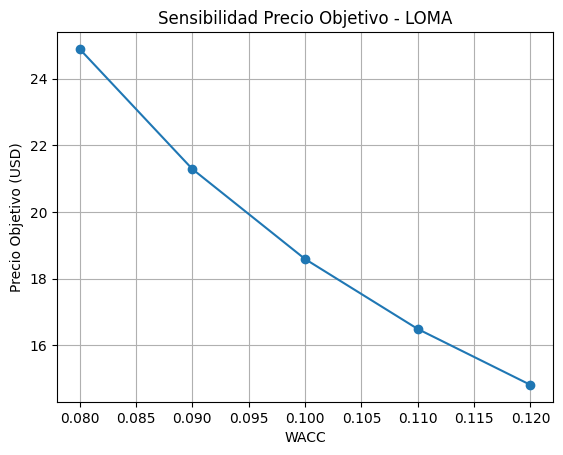

In [8]:
wacc_range = np.arange(0.08, 0.13, 0.01)
sensibilidad = []

for w in wacc_range:
    vp_fcf_w = [fcf / ((1 + w)**i) for i, fcf in enumerate(fcf_proy, start=1)]
    vr = fcf_proy[-1] * (1 + terminal_growth) / (w - terminal_growth)
    vp_vr_w = vr / ((1 + w)**años)
    valor_emp_w = sum(vp_fcf_w) + vp_vr_w
    precio_w = valor_emp_w / acciones if acciones else np.nan
    sensibilidad.append((w, precio_w))

sens_df = pd.DataFrame(sensibilidad, columns=["WACC", "Precio Objetivo"])
display(sens_df)

import matplotlib.pyplot as plt
plt.plot(sens_df["WACC"], sens_df["Precio Objetivo"], marker='o')
plt.xlabel("WACC")
plt.ylabel("Precio Objetivo (USD)")
plt.title(f"Sensibilidad Precio Objetivo - {empresa}")
plt.grid(True)
plt.show()

###Target Price final y comparación con precio de mercado

In [9]:
precio_mercado = tk.history(period="1d")["Close"].iloc[-1]
print(f"Precio Objetivo DCF: {precio_objetivo_dcf:.2f} USD")
print(f"Precio de Mercado Actual: {precio_mercado:.2f} USD")
print(f"Diferencia %: {(precio_objetivo_dcf/precio_mercado - 1)*100:.2f}%")

if precio_objetivo_dcf > precio_mercado * 1.15:
    recomendacion = "COMPRAR"
elif precio_objetivo_dcf < precio_mercado * 0.85:
    recomendacion = "VENDER"
else:
    recomendacion = "MANTENER"

print(f"Recomendación: {recomendacion}")


Precio Objetivo DCF: 18.59 USD
Precio de Mercado Actual: 10.50 USD
Diferencia %: 77.04%
Recomendación: COMPRAR


###Resumen Final

In [10]:
resumen_val = {
    "FCF TTM"               : f"{(fcf_ttm):.0f} USD",
    "WACC Base"             : f"{(wacc)*100:.1f}%",
    "Growth Rate"           : f"{(growth_rate)*100:.1f}%",
    "Terminal Growth"       : f"{(terminal_growth)*100:.1f}%",
    "Valor Empresa"         : f"{(valor_empresa):.0f} USD",
    "Precio Objetivo"       : f"{(precio_objetivo_dcf):.2f} USD",
    "Precio Mercado"        : f"{(precio_mercado):.2f} USD",
    "Diferencia %"          : f"{(precio_objetivo_dcf/precio_mercado - 1)*100:.2f}%",
    "Recomendación"         : recomendacion
}
display(pd.DataFrame([resumen_val]).T)

,0
FCF TTM,150000000 USD
WACC Base,10.0%
Growth Rate,5.0%
Terminal Growth,2.0%
Valor Empresa,2169317835 USD
Precio Objetivo,18.59 USD
Precio Mercado,10.50 USD
Diferencia %,77.04%
Recomendación,COMPRAR


##Conclusion de Analisis fundamental

Basándonos en el análisis fundamental de Loma Negra (LOMA) en comparación con sus competidores sectoriales (CRH, CX, VMC) y la valuación por Descuento de Flujos de Caja (DCF), las principales conclusiones son:

**Fortalezas y Ventajas Competitivas:**

*   Loma Negra posee una posición dominante en el mercado argentino de cemento, con ventajas derivadas de su escala, integración vertical y red de distribución.
*   Presenta múltiplos de valuación (EV/EBITDA, EV/Revenue) significativamente inferiores a los de sus pares internacionales, lo que podría indicar una subvaluación relativa.
*   Su estructura de capital (Total Debt/Equity) es comparable o incluso más baja que la de algunos competidores.

**Debilidades y Riesgos:**

*   La principal debilidad y fuente de riesgo para LOMA es su alta exposición al inestable contexto macroeconómico argentino, incluyendo riesgo cambiario, inflacionario y regulatorio.
*   Los márgenes de rentabilidad (Operating Margin, Profit Margin, ROE, ROA) son inferiores a los de sus competidores más eficientes a nivel global.
*   La dependencia de insumos con precios volátiles (energía) y los riesgos operativos y sindicales son factores a considerar.

**Valuación DCF:**

*   La valuación DCF simplificada, utilizando un FCF base estimado, una tasa de crecimiento del 5%, una tasa de descuento (WACC) del 10%, y un crecimiento terminal del 2%, arroja un precio objetivo de **18.59 USD**.
*   Este precio objetivo es significativamente superior al precio de mercado actual de **10.50 USD**, sugiriendo un potencial de apreciación del **77.04%**.
*   El análisis de sensibilidad muestra que el precio objetivo es sensible a cambios en el WACC; sin embargo, incluso con un WACC del 12%, el precio objetivo de 14.81 USD sigue siendo superior al precio actual.

**Recomendación de Inversión:**

Considerando la aparente subvaluación de Loma Negra según el modelo DCF y sus sólidas ventajas competitivas estructurales en el mercado local, a pesar de los riesgos inherentes al contexto argentino, la recomendación fundamental es **COMPRAR**.

Esta recomendación se basa en la expectativa de que el mercado eventualmente reconocerá el valor intrínseco de la empresa, asumiendo una eventual estabilización macroeconómica o una mejora en la percepción de riesgo del país. Es crucial monitorear de cerca la evolución de la situación económica y regulatoria en Argentina.

#Pregunta Crítica
Considerando tu análisis de cartera, técnico y fundamental, ¿cuál sería tu estrategia completa de inversión? ¿Contra qué benchmark compararías el performance y por qué?

Mi estrategia para Loma Negra combina los hallazgos del análisis de cartera, técnico y fundamental:

**Desde el análisis de cartera**:
* La combinación óptima encontrada (50% activos argentinos y 50% internacionales) con el máximo Ratio de Sharpe bajo esa restricción permite diversificación geográfica.
* Los activos argentinos ofrecen potencial de retorno alto pero con volatilidad elevada; los internacionales aportan estabilidad y reducen la correlación global del portafolio.
* Esta estructura es adecuada para un horizonte de mediano/largo plazo y para un inversor con tolerancia al riesgo moderada-alta.

**Desde el análisis técnico**:
* LOMA presenta oportunidades de entrada cuando se alinean señales de medias móviles, momentum (RSI, MACD, ADX) y volatilidad (Bandas de Bollinger).
* El backtesting mostró que una estrategia combinada de indicadores mejora el rendimiento ajustado por riesgo respecto a buy & hold, aunque la efectividad puede verse limitada por la baja liquidez y alta volatilidad del mercado argentino.
* Se recomienda usar marcos temporales medios-largos para filtrar ruido y evitar señales falsas.

**Desde el análisis fundamental**:
* Loma Negra destaca por su bajo EV/EBITDA y buenos márgenes, aunque presenta ROE menor que sus pares globales.
* El DCF simplificado indica un precio objetivo superior al actual, respaldando una recomendación de Compra, pero sujeto a riesgos elevados por contexto macro y regulación.
* Su moat se basa en liderazgo de mercado, escala e integración vertical, pero enfrenta amenazas cambiarias, regulatorias y de demanda interna.

**Estrategia integrada**:
Mantener Loma Negra en cartera con un peso controlado dentro del bloque argentino, combinada con acciones internacionales del sector y otros mercados para mitigar riesgo país. Tomar decisiones de entrada/salida basadas en confirmación técnica sobre niveles clave y señales de tendencia. Revisar trimestralmente la posición en función de resultados financieros y cambios macroeconómicos.

**Benchmark sugerido**:
Comparar el rendimiento contra el MERVAL en dólares (USD CCL) para evaluar el desempeño relativo en el contexto argentino y contra el S&P500 para medir el rendimiento frente a un mercado desarrollado y diversificado globalmente. Esto permite identificar si la estrategia agrega valor frente al mercado local y también frente a un estándar internacional.